In [168]:
from __future__ import print_function
import ROOT
import numpy
import array

In [169]:
# ListOfFiles = ["fitDiagnostics0.2.root", 
#                "fitDiagnostics0.3.root",  
#                "fitDiagnostics0.4.root", 
#                "fitDiagnostics0.5.root",
#                "fitDiagnostics0.6.root",
#                "fitDiagnostics0.7.root", 
#                "fitDiagnostics0.8.root",  
#                "fitDiagnostics0.9.root", 
#                "fitDiagnostics1.0.root",
#                "fitDiagnostics1.1.root",
#                "fitDiagnostics1.2.root", 
#                "fitDiagnostics1.3.root",  
#                "fitDiagnostics1.4.root", 
#                "fitDiagnostics1.5.root",
#                "fitDiagnostics1.6.root",
#                "fitDiagnostics1.7.root", 
#                "fitDiagnostics1.8.root",  
#                "fitDiagnostics1.9.root", 
#                "fitDiagnostics2.0.root"
#               ]
ListOfFiles = ["fitDiagnostics0.2.root", 
               "fitDiagnostics0.4.root", 
               "fitDiagnostics0.6.root",
               "fitDiagnostics0.8.root",  
               "fitDiagnostics1.0.root",
               "fitDiagnostics1.2.root", 
               "fitDiagnostics1.4.root", 
               "fitDiagnostics1.6.root",
               "fitDiagnostics1.8.root",  
               "fitDiagnostics2.0.root"
              ]

In [170]:
c1 = ROOT.TCanvas( 'c1', 'measured vs expected signal strength', 200, 10, 700, 500 )
c1.SetGrid()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [171]:
xData = list(numpy.arange(0.2,2.1,0.2))
yData = []
n = len(x)
errMinusData = []
errPlusData = []
for ifile in ListOfFiles:
#     print (ifile[14:-5])
    myfile = ROOT.TFile(ifile,"read")
    if myfile.GetListOfKeys().Contains("fit_s") is False:
        print (ifile[14:-5], "fit_s could not find. ")
        continue
    fit_s = myfile.Get("fit_s")
    yData.append(fit_s.floatParsFinal().find("r").getVal())
    errMinusData.append(abs(fit_s.floatParsFinal().find("r").getErrorLo()))
    errPlusData.append(fit_s.floatParsFinal().find("r").getErrorHi())

#     yData.append(fit_s.floatParsFinal().find("nonPromptSF").getVal())
#     errMinusData.append(abs(fit_s.floatParsFinal().find("nonPromptSF").getErrorLo()))
#     errPlusData.append(fit_s.floatParsFinal().find("nonPromptSF").getErrorHi())

x = array.array( 'f', xData )
y = array.array( 'f', yData )
errMinus = array.array( 'f', errMinusData )
errPlus  = array.array( 'f', errPlusData )


Info in <TCanvas::Print>: pdf file ttgammaToy_ttgamma.pdf has been created


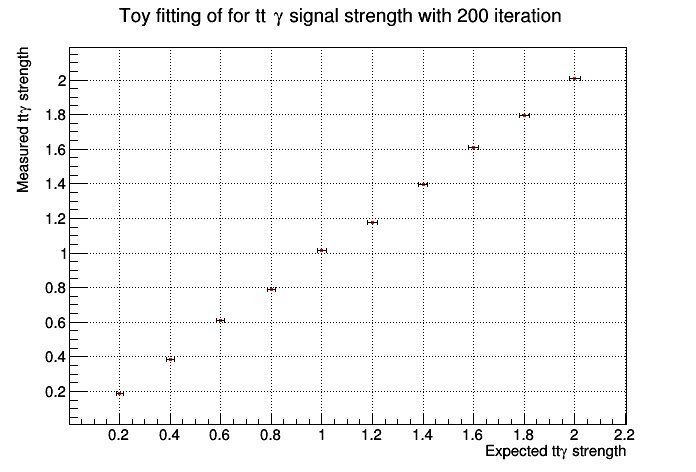

In [172]:
gr = ROOT.TGraphAsymmErrors( n, x, y, errMinus, errPlus)
gr.SetTitle('Toy fitting of for tt#gamma signal strength with 200 iteration')
gr.GetXaxis().SetTitle("Expected tt#gamma strength");
gr.GetYaxis().SetTitle("Measured tt#gamma strength");
gr.SetMarkerColor(2)
gr.SetMarkerStyle(7)
# gr.SetMarkerSize(3)
gr.Draw('AP')
c1.Draw()
c1.Print("ttgammaToy_ttgamma.pdf")

In [173]:
xData1 = list(numpy.arange(0.2,2.1,0.2))
yData1 = []
n1 = len(x)
errMinusData1 = []
errPlusData1 = []
for ifile in ListOfFiles:
#     print (ifile[14:-5])
    myfile = ROOT.TFile(ifile,"read")
    if myfile.GetListOfKeys().Contains("fit_s") is False:
        print (ifile[14:-5], "fit_s could not find. ")
        continue
    fit_s = myfile.Get("fit_s")
    yData1.append(fit_s.floatParsFinal().find("nonPromptSF").getVal())
    errMinusData1.append(abs(fit_s.floatParsFinal().find("nonPromptSF").getErrorLo()))
    errPlusData1.append(fit_s.floatParsFinal().find("nonPromptSF").getErrorHi())

x = array.array( 'f', xData1 )
y = array.array( 'f', yData1 )
errMinus = array.array( 'f', errMinusData1 )
errPlus  = array.array( 'f', errPlusData1 )

Info in <TCanvas::Print>: pdf file ttgammaToy_nonPrompt.pdf has been created


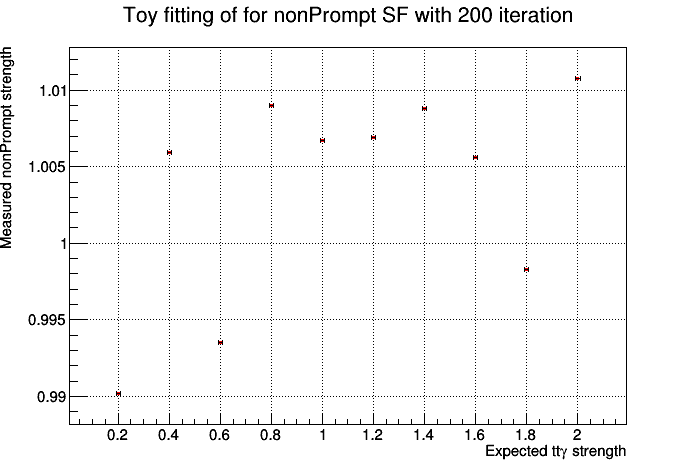

In [175]:
gr = ROOT.TGraphAsymmErrors( n, x, y, errMinus, errPlus)
gr.SetTitle('Toy fitting of for nonPrompt SF with 200 iteration')
gr.GetXaxis().SetTitle("Expected tt#gamma strength");
gr.GetYaxis().SetTitle("Measured nonPrompt strength");
gr.SetMarkerColor(2)
gr.SetMarkerStyle(7)
# gr.SetMarkerSize(3)
gr.Draw('AP')
c1.Draw()
c1.Print("ttgammaToy_nonPrompt.pdf")